In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [84]:
def solve_linear_system(coefficients, constants):
    """
    Function to solve a system of linear equations with any number of unknowns
    
    :param coefficients: Coefficient matrix of the equations. nxn matrix
    :param constants: Vector of constant terms [b1, b2, ..., bn]
    :return: Solution of the system and details of calculation method
    """
    
    # Convert inputs to numpy arrays
    A = np.array(coefficients, dtype=float)
    b = np.array(constants, dtype=float)
    
   # Validate input dimensions
    n = b.shape[0]  # Number of equations/unknowns
    if A.shape != (n, n):
        raise ValueError(f"Input must be a system of {n} equations with {n} unknowns")
        
    results = {}
    
    det_A = np.linalg.det(A)
    print(f"Determinant: {det_A:.2f}")
    
    if abs(det_A) < 1e-10:
        results["inverse"] = "Cannot compute inverse (singular matrix)"
    else:
        # Calculate inverse of coefficient matrix
        A_inv = np.linalg.inv(A)  # 1/det * adj = 1/det * [Cof^T}
        
        # Calculate solution x = A^(-1) * b
        solution = np.dot(A_inv, b)
        
        results["inverse"] = {
            "A_inverse": A_inv.tolist(),
            "solution": solution.tolist()
        }

    coff_transpose = A_inv * det_A
    coff = coff_transpose.T
    print("\nCofactor:")
    print(coff)
       
    return results


def print_results(coefficients, constants, results, *args):
    print("\nSystem of equations:")
   
    for row, const in zip(coefficients, constants):
        eq = " + ".join(f"{a}{args[i]}" for i, a in enumerate(row))
        print(f"{eq} = {const}")
    
    print("\nResults:")
    for method, result in results.items():
        if isinstance(result, dict):
            if "solution" in result:
                sol_str = ", ".join(f"{args[i]} = {val:.2f}" for i, val in enumerate(result["solution"]))
                print(f"Solution: {sol_str}")
            for key, value in result.items():
                if key != "solution":
                    print(f"{key}: {value}")
        else:
            print(result)
    print("\n" + "=" * 40 + "\n")

# Example system:
# x - y = 8
# 3x + 2y = 24

coefficients_1 = [[1, -1], [3, 2]]
constants_1 = [8, 24]

results_1 = solve_linear_system(coefficients_1, constants_1)
print_results(coefficients_1, constants_1, results_1, "x", "y")

# Example system:
# 6x + y = 12
# 3y + 2x = 20
        
coefficients_2 = [[6, 1], [2, 3]]
constants_2 = [12, 20]

results_2 = solve_linear_system(coefficients_2, constants_2)
print_results(coefficients_2, constants_2, results_2, "x", "y")

# Example system:
# 2x + y = 3
# x + y + z = 0
# y + 3z = -1
        
coefficients_3 = [[2, 1, 0], [1, 1, 1], [0, 1, 3]]
constants_3 = [3, 0, -1]

results_3 = solve_linear_system(coefficients_3, constants_3)
print_results(coefficients_3, constants_3, results_3, "x", "y", "z")

# Example system:
# 3x - 2y - 4z = 4
# x - 2z + 3y = 8
# 2x - 4y + 3z = 3
        
coefficients_4 = [[3, -2, -4], [1, 3, -2], [2, -4, 3]]
constants_4 = [4, 8, 3]

results_4 = solve_linear_system(coefficients_4, constants_4)
print_results(coefficients_4, constants_4, results_4, "x", "y", "z")

Determinant: 5.00

Cofactor:
[[ 2. -3.]
 [ 1.  1.]]

System of equations:
1x + -1y = 8
3x + 2y = 24

Results:
Solution: x = 8.00, y = 0.00
A_inverse: [[0.4000000000000001, 0.19999999999999998], [-0.6000000000000001, 0.2]]


Determinant: 16.00

Cofactor:
[[ 3. -2.]
 [-1.  6.]]

System of equations:
6x + 1y = 12
2x + 3y = 20

Results:
Solution: x = 1.00, y = 6.00
A_inverse: [[0.1875, -0.0625], [-0.125, 0.375]]


Determinant: 1.00

Cofactor:
[[ 2. -3.  1.]
 [-3.  6. -2.]
 [ 1. -2.  1.]]

System of equations:
2x + 1y + 0z = 3
1x + 1y + 1z = 0
0x + 1y + 3z = -1

Results:
Solution: x = 5.00, y = -7.00, z = 2.00
A_inverse: [[2.0, -3.0, 1.0], [-3.0, 6.0, -2.0], [1.0, -2.0, 1.0]]


Determinant: 57.00

Cofactor:
[[  1.  -7. -10.]
 [ 22.  17.   8.]
 [ 16.   2.  11.]]

System of equations:
3x + -2y + -4z = 4
1x + 3y + -2z = 8
2x + -4y + 3z = 3

Results:
Solution: x = 4.00, y = 2.00, z = 1.00
A_inverse: [[0.01754385964912278, 0.3859649122807018, 0.28070175438596495], [-0.12280701754385966, 0.298245

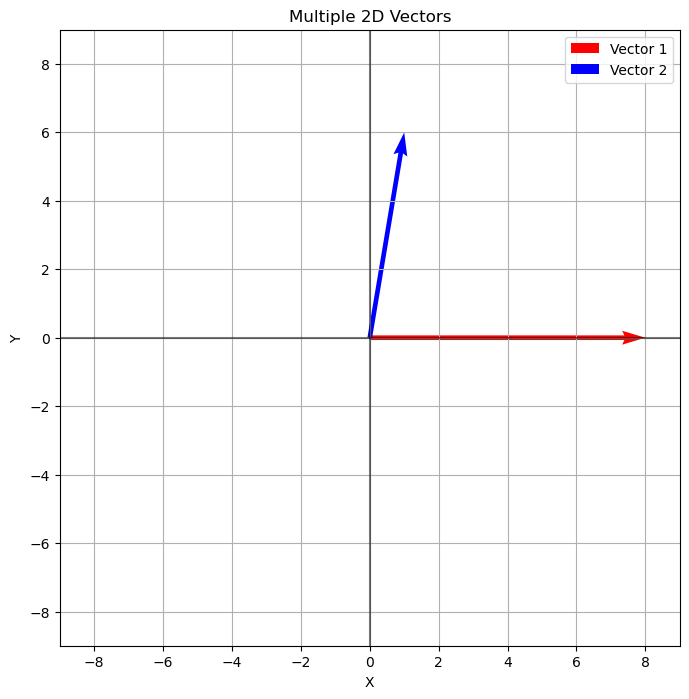

In [118]:
def draw_vector(vector, color, ax=None, label=None):
    """
    Draws a vector from the origin with the given color
    
    Parameters:
    vector : list or numpy array of size 2 or 3 representing the vector
    color : string representing the color (default: 'blue')
    ax : axis object for plotting (optional)
    label : label for the vector (optional)
    
    Returns:
    ax : the axis object where the vector was drawn
    """
    vector = np.array(vector)
        
    # Check if it's a 2D or 3D vector
    if len(vector) == 2:
        # 2D vector
        if ax is None:
            fig, ax = plt.subplots(figsize=(8, 8))
        
        # Draw the vector from the origin
        ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)
        
        # Set axis limits
        max_val = max(abs(vector[0]), abs(vector[1])) * 1.5
        ax.set_xlim([-max_val, max_val])
        ax.set_ylim([-max_val, max_val])
        
        # Add grid, axes, and titles
        ax.grid(True)
        ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title('2D Vector Plot')
        
    elif len(vector) == 3:
        # 3D vector
        if ax is None:
            fig = plt.figure(figsize=(10, 10))
            ax = fig.add_subplot(111, projection='3d')
        
        # Draw the vector from the origin
        ax.quiver(0, 0, 0, vector[0], vector[1], vector[2], color=color, label=label)
        
        # Set axis limits
        max_val = max(abs(vector[0]), abs(vector[1]), abs(vector[2])) * 1.5
        ax.set_xlim([-max_val, max_val])
        ax.set_ylim([-max_val, max_val])
        ax.set_zlim([-max_val, max_val])
        
        # Add titles
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('3D Vector Plot')
    
    # Add legend if label is provided
    if label:
        ax.legend()
    
    return ax

# two 2D vectors

fig, ax = plt.subplots(figsize=(8, 8))
draw_vector(results_1['inverse']['solution'], color='red', ax=ax, label='Vector 1')
draw_vector(results_2['inverse']['solution'], color='blue', ax=ax, label='Vector 2')
plt.title('Multiple 2D Vectors')
plt.legend()
plt.show()



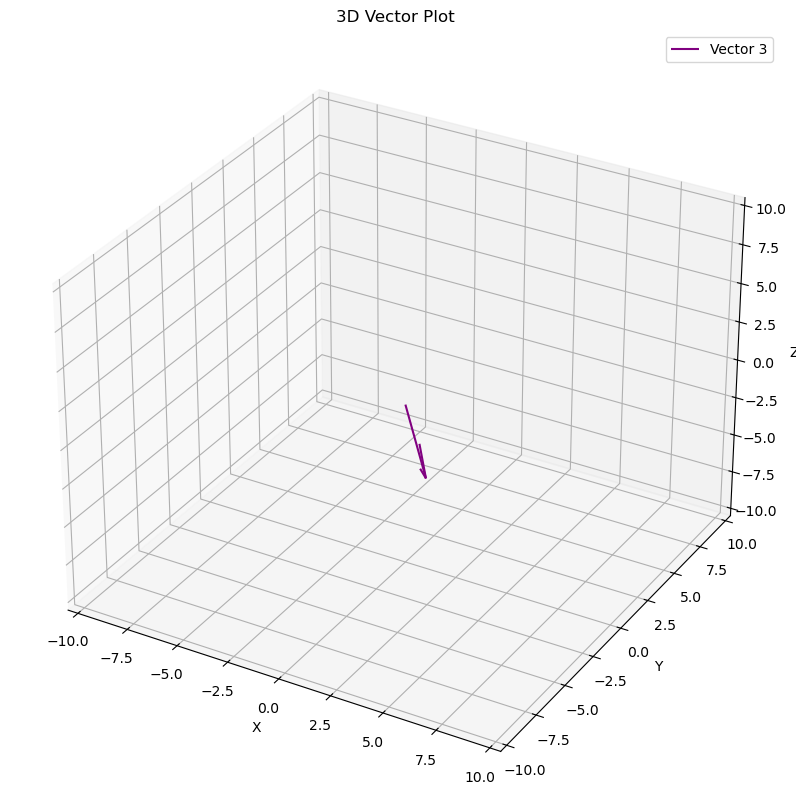

In [124]:
# 3D vector 3
draw_vector(results_3['inverse']['solution'], color='purple', label='Vector 3')
plt.show()

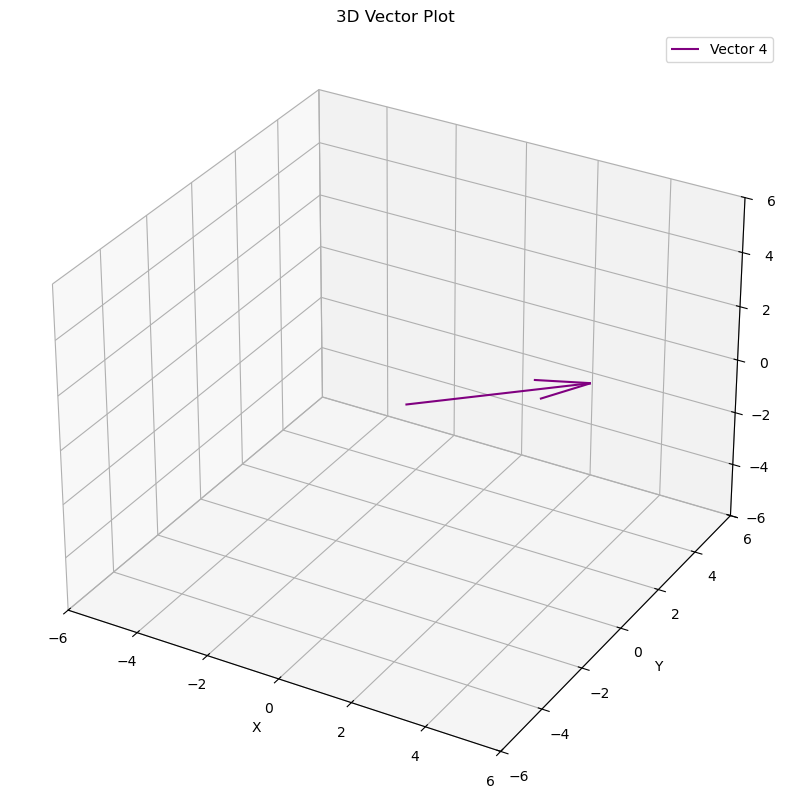

In [122]:
# 3D vector 3
draw_vector(results_4['inverse']['solution'], color='purple', label='Vector 4')
plt.show()